In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import os
os.chdir('/content/gdrive/MyDrive/2021/졸업프로젝트 code')

In [32]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!pip install konlpy

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from konlpy.tag import * 
from gensim.models import Word2Vec, FastText

In [5]:
twitter = Okt()
komoran = Komoran()
kkma = Kkma()

In [6]:
data = pd.read_csv('titles_preprocessed.csv', names = ['views', 'title'], usecols = [5, 6])
data.head()

,views,title
0,30038.0,만 19세 연봉 1억 친구와 레스토랑 브이로그
1,29102.0,bbq 신메뉴 체고치 순살 먹어봄
2,25022.0,구찌 라이톤이랑 시계 후기
3,49551.0,엽기 로제떡볶이랑 허니 콤보 혼내줌
4,74348.0,어림도 없지 바로 마라탕 먹어버림


In [7]:
# title-view
title_view = data[['title', 'views']]
title_view.head()

,title,views
0,만 19세 연봉 1억 친구와 레스토랑 브이로그,30038.0
1,bbq 신메뉴 체고치 순살 먹어봄,29102.0
2,구찌 라이톤이랑 시계 후기,25022.0
3,엽기 로제떡볶이랑 허니 콤보 혼내줌,49551.0
4,어림도 없지 바로 마라탕 먹어버림,74348.0


In [8]:
# title
titles = data['title']
titles.head()

0    만 19세 연봉 1억 친구와 레스토랑 브이로그
1           bbq 신메뉴 체고치 순살 먹어봄
2               구찌 라이톤이랑 시계 후기
3          엽기 로제떡볶이랑 허니 콤보 혼내줌
4           어림도 없지 바로 마라탕 먹어버림
Name: title, dtype: object

제목의 최대 길이 : 231
제목의 평균 길이 : 54.892738523585464


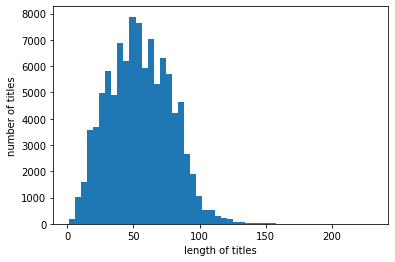

In [31]:
# 제목 길이 분포 
print('제목의 최대 길이 :',max(len(l) for l in titles))
print('제목의 평균 길이 :',sum(map(len, titles))/len(titles))
plt.hist([len(s) for s in titles], bins=50)
plt.xlabel('length of titles')
plt.ylabel('number of titles')
plt.show()

In [10]:
def make_corpus(text):
    corpus = []
    for s in titles:
        corpus.append(s.split()) 
    return corpus

In [12]:
# test = make_corpus(titles[:100])

Word2Vec parameters
* size: 임베딩 차원
* window: 윈도우 사이즈
* min_count: 고려할 단어의 최소 빈도 기준
* workers: cpu core 수
* iter: 반복 횟수
* sg == 0: CBOW, sg==1: Skip-Gram

In [12]:
# Skip-Gram 임베딩 모델 
skip_gram = Word2Vec(corpus, size=100, window=3, min_count=5, workers=-1, iter=1000, sg=1) 

In [13]:
words = skip_gram.wv.index2word # one hot encoding 알아서 해줌 

In [14]:
vectors = skip_gram.wv.vectors  # 토큰 임베딩한 벡터들 

In [15]:
vectors

array([[-0.00194565,  0.00411911,  0.0043943 , ...,  0.00135817,
         0.00208304,  0.00282606],
       [-0.00430006, -0.00422739,  0.00348441, ..., -0.00300247,
        -0.00389155, -0.00228879],
       [ 0.00473761,  0.00204963, -0.00388407, ...,  0.00185586,
        -0.00274489,  0.0037103 ],
       ...,
       [-0.00485401,  0.00142106,  0.00371328, ..., -0.00307932,
         0.00413899,  0.00205681],
       [-0.00329401,  0.00337624,  0.00285043, ..., -0.00133526,
         0.00044111, -0.00087449],
       [ 0.00167828, -0.00458653, -0.00026711, ...,  0.00032843,
        -0.00057822, -0.00360088]], dtype=float32)

In [16]:
# 토큰과 벡터 묶기
dictionary = dict(zip(words, vectors))

In [17]:
# 코사인 유사도 기반 '브이로그' 토큰과 유사한 토큰 top5 뽑아보기
skip_gram.most_similar('브이로그', topn=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('헬로음이유니', 0.3756687343120575),
 ('우리집', 0.3568686842918396),
 ('모습에', 0.35072439908981323),
 ('끝을', 0.3500508666038513),
 ('솔직히', 0.3356555104255676),
 ('콩나물', 0.3355344831943512),
 ('wants', 0.3339277505874634),
 ('애교', 0.33280932903289795),
 ('승끼', 0.3296544551849365),
 ('인박싱', 0.32700783014297485),
 ('핵사이다', 0.3263206481933594),
 ('노렌즈', 0.3251965045928955),
 ('【tvpp】wonder', 0.3237203359603882),
 ('충격에', 0.3235441744327545),
 ('전화번호', 0.32330521941185),
 ('defense', 0.3228134214878082),
 ('알았는데', 0.32112306356430054),
 ('발각된', 0.3151914179325104),
 ('널', 0.3093665838241577),
 ('자본주의', 0.3089737594127655)]

In [22]:
# 임베딩 벡터 확인하기
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = list(range(100)))
# w2v_df['word'] = words
w2v_df.insert(loc=0, column='word', value=words)
# w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,!,-0.001946,0.004119,0.004394,-0.003679,0.002070,0.003374,0.002664,-0.001982,0.003567,-0.004566,0.001090,0.001254,-0.000447,-0.002731,0.003424,-0.002921,0.001525,0.000293,0.004468,-0.002122,-0.000335,-0.000017,-0.004413,0.003333,0.003432,-0.003805,-0.001853,-0.000534,0.004185,0.002159,0.000676,0.000143,0.004027,-0.001391,0.004605,-0.001274,-0.000726,-0.001429,-0.002548,...,-0.003438,-0.003093,0.000388,-0.003235,-0.000500,-0.000928,0.003502,-0.003238,0.004751,-0.004742,-0.004673,0.002246,0.001166,-0.003369,0.003347,0.000880,-0.001520,0.004951,0.000736,-0.001961,0.000210,0.003804,-0.002670,0.001703,0.003562,-0.001994,0.001114,-0.003804,-0.004508,-0.003240,-0.001283,0.000970,-0.003534,-0.002740,0.001428,0.001161,-0.004451,0.001358,0.002083,0.002826
1,?,-0.004300,-0.004227,0.003484,0.003849,0.003768,-0.004259,-0.004321,-0.001819,0.004167,-0.002059,0.000506,-0.000045,-0.004913,-0.004037,0.001763,-0.003649,-0.002999,0.001201,-0.002968,0.003201,0.000308,0.003912,-0.001533,-0.001043,-0.001893,-0.002254,0.004836,0.001308,-0.001625,-0.003366,-0.001837,-0.003975,-0.001147,0.000629,-0.001093,-0.002628,-0.003948,-0.000068,-0.002996,...,-0.004776,-0.002213,-0.002114,0.000845,0.003923,-0.001481,-0.000734,0.004984,-0.001649,-0.003724,0.000107,-0.004298,0.001245,-0.003630,-0.003761,-0.003043,0.003817,0.004725,-0.003673,0.003383,0.004296,-0.004101,-0.001517,-0.004468,-0.000395,-0.000413,-0.003770,-0.004450,0.000850,-0.004567,0.004925,-0.004150,-0.003209,-0.004126,-0.002929,-0.004347,-0.004484,-0.003002,-0.003892,-0.002289
2,ep,0.004738,0.002050,-0.003884,0.000740,-0.000414,-0.003450,-0.002402,0.004992,-0.000413,-0.003296,-0.003005,-0.002237,-0.002503,-0.000242,0.000365,0.003216,0.002201,0.002804,-0.001125,-0.002281,0.002741,0.004099,0.000989,0.000221,-0.000197,-0.001759,0.003912,-0.004550,0.002348,-0.002906,0.004741,-0.000699,-0.001459,-0.000014,0.002343,0.000574,0.003257,-0.004812,-0.001830,...,-0.003333,-0.001242,0.002718,0.003693,0.003416,0.004741,0.002509,-0.002847,-0.000718,-0.001255,-0.002961,-0.000740,0.000050,0.000983,0.002578,-0.001649,-0.004427,-0.001360,0.000587,0.002027,0.001103,0.000165,-0.001195,-0.004748,0.004275,-0.002052,-0.002619,0.004348,-0.000015,0.000302,0.001151,0.000089,0.004574,-0.004398,-0.002142,0.003692,-0.002764,0.001856,-0.002745,0.003710
3,브이로그,-0.001428,0.001725,0.004756,-0.001226,0.004063,-0.003852,-0.002630,-0.003852,-0.000033,-0.003329,0.003809,0.000572,0.000499,-0.000202,-0.003457,0.003821,0.000303,0.000876,-0.001062,-0.003243,0.003082,0.002325,0.004413,-0.003048,0.000087,-0.002516,-0.002583,0.000088,0.003696,-0.001075,-0.004000,-0.002729,-0.003421,-0.000980,-0.000440,-0.001634,0.000890,0.004929,0.002588,...,0.004107,-0.002837,0.001263,-0.003921,0.004608,-0.004157,-0.000994,0.002142,-0.002453,0.000389,0.000329,-0.003250,0.001553,0.004086,0.002847,0.001846,-0.003570,0.004463,-0.002149,-0.003185,0.003501,-0.001486,0.000747,-0.004676,0.003252,-0.002445,-0.001825,0.003182,0.000363,-0.000549,-0.003348,-0.001362,-0.003935,-0.002976,0.004535,0.001119,0.000931,0.003248,0.001146,-0.001816
4,vlog,0.002097,0.001912,0.001264,-0.004941,-0.002341,-0.002106,0.002583,-0.000622,-0.004195,-0.003888,-0.002950,0.004938,0.000763,0.000215,-0.001571,0.004492,-0.000314,-0.003988,-0.003343,-0.004654,0.001285,-0.003867,0.004687,-0.000782,0.003763,-0.002559,-0.002529,-0.002729,0.003870,0.002527,-0.001231,0.001562,0.001405,0.003018,0.000524,-0.002107,0.002573,-0.002602,0.003623,...,-0.002261,-0.002804,0.000198,0.004017,-0.004998,-0.004982,-0.004638,0.004045,0.001700,-0.001091,0.001057,0.003270,0.002590,-0.004680,-0.000268,0.004242,-0.001092,0.000458,0.003087,-0.001716,0.003792,-0.003802,-0.001177,0.003056,0.002731,0.002260,-0.000835,-0.002257,0.003406,0.004928,-0.000133,-0.000923,-0.004194,-0.002317,0.0

In [30]:
# 모델 저장하기
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') 